# 03. Player Similarity

In [109]:
# change wd to repo home
import os
if os.getcwd().split('\\')[-1] == 'notebooks':
    os.chdir('..')

In [110]:
from modules.fm_functions import *

In [111]:
# raw data
player_data_2023_raw = pd.read_csv('data/2023_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2023_raw.index = player_data_2023_raw.index + '_2023'
player_data_2022_raw = pd.read_csv('data/2022_FBRef_meandiff.csv', index_col=1).iloc[:, 3:]
player_data_2022_raw.index = player_data_2022_raw.index + '_2022'

In [112]:
player_data_raw = pd.concat([player_data_2022_raw, player_data_2023_raw])

In [113]:
from sklearn.preprocessing import MinMaxScaler
player_data_scaled = MinMaxScaler().fit_transform(player_data_raw)
player_data_scaled = pd.DataFrame(player_data_scaled, index=player_data_raw.index, columns=player_data_raw.columns)

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.8)

In [115]:
player_data_pca = pd.DataFrame(index=player_data_scaled.index)
pca_types_dict = {}
explained_variance_total = 0

for column_group in stat_types_dict.keys():
        current_columns = stat_types_dict[column_group]
        pca_result = pca.fit_transform(player_data_scaled[current_columns])
        pca_names = f'{column_group}_' + pca.get_feature_names_out()
        pca_types_dict[column_group] = pca_names.tolist()
        player_data_pca[pca_names] = pca_result
        explained_variance_total += pca.explained_variance_ratio_.sum()

explained_variance_total /= len(pca_types_dict)
explained_variance_total

0.8732491442573421

In [116]:
player_data_pca_scaled = MinMaxScaler().fit_transform(player_data_pca)
player_data_pca_scaled = pd.DataFrame(player_data_pca_scaled, index=player_data_pca.index, columns=player_data_pca.columns)

In [117]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# similarity_matrix = cosine_similarity(player_data_pca_scaled)
similarity_matrix = euclidean_distances(player_data_pca_scaled)
similarity_matrix = pd.DataFrame(similarity_matrix, index=player_data_pca_scaled.index, columns=player_data_pca_scaled.index)

In [118]:
find_most_similar_strings('baena', similarity_matrix.index, n=10)

['Alex Baena_2022',
 'Alex Baena_2023',
 'Catena_2022',
 'Catena_2023',
 'Dion Drena Beljo_2022',
 'Kenan Karaman_2022',
 'Renato Veiga_2022',
 'Renan Lodi_2022',
 'Renato Tapia_2022',
 'Johann Lepenant_2022']

In [119]:
similarity_matrix.loc['Bruno Fernandes_2023'].sort_values(ascending=True)[1:21]
# similarity_matrix.loc['Lionel Messi_2022'].sort_values(ascending=True)[1:21]

_Player_
Benjamin Bourigeaud_2022      0.380089
Alfie Doughty_2023            0.389281
Pascal Groß_2023              0.468549
Gerard Gumbau_2022            0.475620
Enzo Le Fée_2022              0.493389
Alex Baena_2023               0.498934
Téji Savanier_2023            0.506640
Isco_2023                     0.511854
Kevin Stöger_2022             0.557929
Teun Koopmeiners_2022         0.563134
Alex Iwobi_2022               0.569839
James Ward-Prowse_2022        0.582096
Pascal Groß_2022              0.588383
Branco van den Boomen_2022    0.591246
Kevin Stöger_2023             0.605040
Sergi Darder_2022             0.615812
José Luis García Vayá_2023    0.628457
Luis Alberto_2023             0.632169
Gustavo Hamer_2023            0.641806
Mathias Jensen_2022           0.649095
Name: Bruno Fernandes_2023, dtype: float64

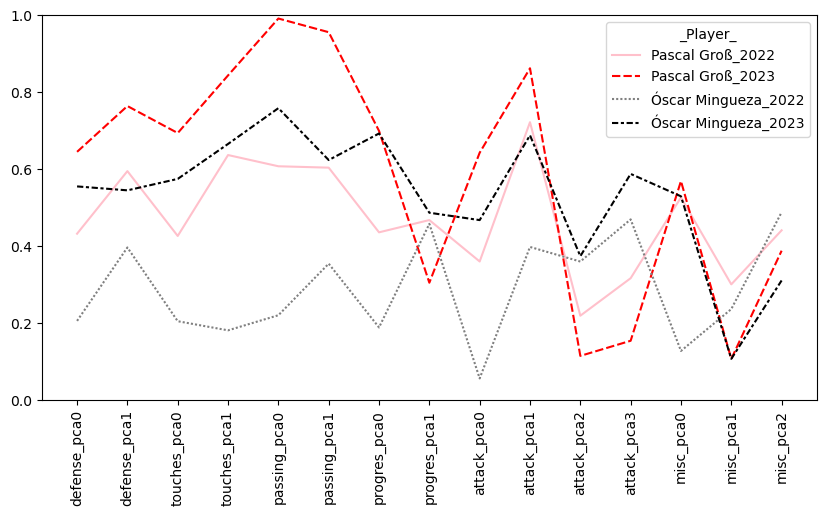

In [120]:
graph_players = ['Pascal Groß_2022',
                 'Pascal Groß_2023',
                 'Óscar Mingueza_2022',
                 'Óscar Mingueza_2023']

palette = ['pink',
           'red',
           'grey',
           'black']

fig, axs = plt.subplots(figsize=(10,5))
plt.ylim(0, 1)
plt.xticks(rotation=90)
sns.lineplot(data=player_data_pca_scaled.loc[graph_players].T, palette=palette)
plt.show()

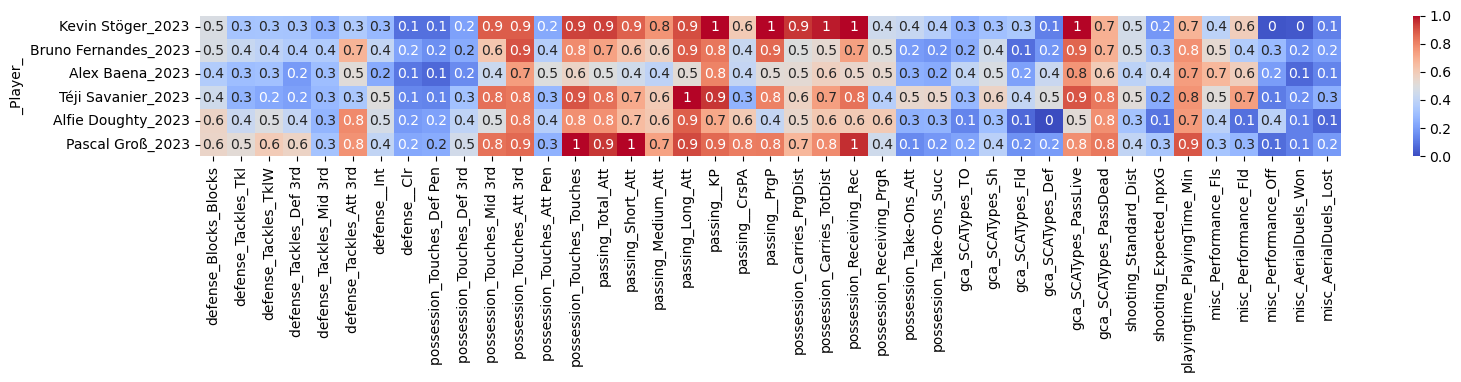

In [121]:
fig, ax = plt.subplots(figsize=(15,2))
plt.tight_layout()
heatmap_data = player_data_scaled.loc[['Kevin Stöger_2023', 'Bruno Fernandes_2023', 'Alex Baena_2023',
                                       'Téji Savanier_2023', 'Alfie Doughty_2023', 'Pascal Groß_2023']]
sns.heatmap(heatmap_data,
            cmap='coolwarm', annot=round(heatmap_data, 1))
plt.show()

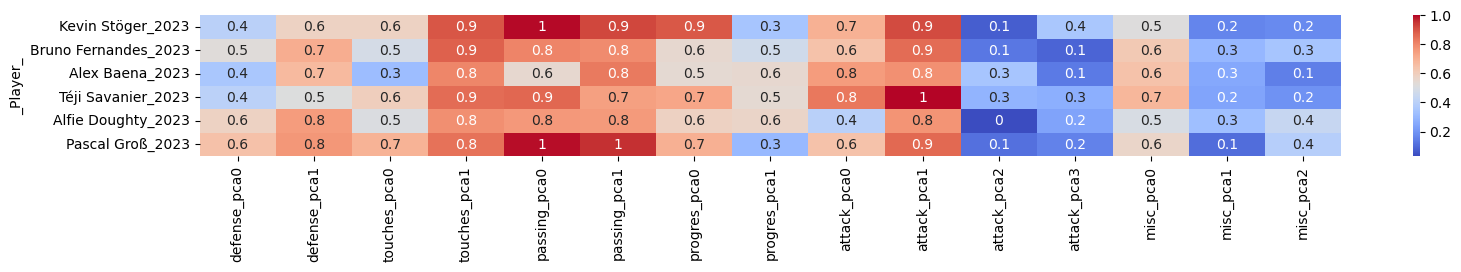

In [122]:
fig, ax = plt.subplots(figsize=(15,2))
plt.tight_layout()
heatmap_data = player_data_pca_scaled.loc[['Kevin Stöger_2023', 'Bruno Fernandes_2023', 'Alex Baena_2023',
                                       'Téji Savanier_2023', 'Alfie Doughty_2023', 'Pascal Groß_2023']]
sns.heatmap(heatmap_data,
            cmap='coolwarm', annot=round(heatmap_data, 1))
plt.show()

<Axes: >

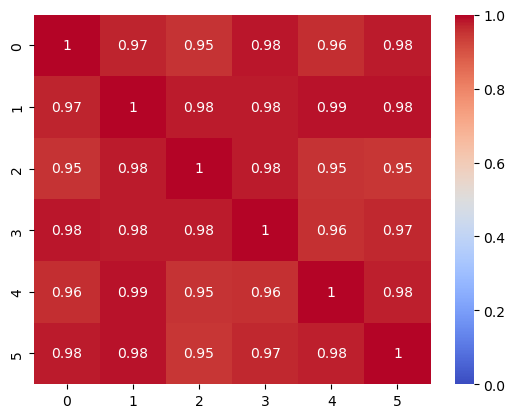

In [123]:
sns.heatmap(cosine_similarity(heatmap_data), vmax=1, vmin=0, cmap='coolwarm', annot=cosine_similarity(heatmap_data))

<Axes: >

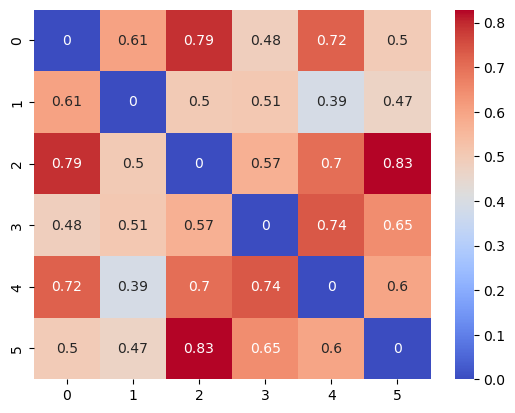

In [124]:
sns.heatmap(euclidean_distances(heatmap_data), vmin=0, cmap='coolwarm', annot=euclidean_distances(heatmap_data))

In [17]:
def plot_team_radar(data: dict, color='#FF5733') -> None:

    # Each attribute we'll plot in the radar chart.
    labels = list(data.keys())
    values = list(data.values())
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop and append the start value to the end.
    values += values[:1]
    labels += labels[:1]
    angles += angles[:1]

    # Create the figure and polar subplot
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    # Draw the outline of our data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    # Fill it in
    ax.fill(angles, values, color=color, alpha=0.4)

    # Fix axis to go in the right order and start at 12 o'clock
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label
    ax.set_thetagrids(np.degrees(angles), labels, fontsize=12, color='#4B0082')

    # Adjust alignment of labels
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 20
    ax.set_ylim(0, 1)
    ax.set_rgrids([0.25, 0.50, 0.75, 1.00], color='#AAAAAA', alpha=0.5)

    # Set position of y-labels
    ax.set_rlabel_position(180 / num_vars)

    # Customize appearance
    ax.tick_params(colors='#4B0082')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(color='#DDDDDD', linestyle='--')
    ax.spines['polar'].set_color('#4B0082')
    ax.set_facecolor('#FAFAFA')

    # Set title with a stylish font
    # ax.set_title(data['name'], y=1.1, fontsize=20, color='#4B0082', fontweight='bold')
    plt.show()

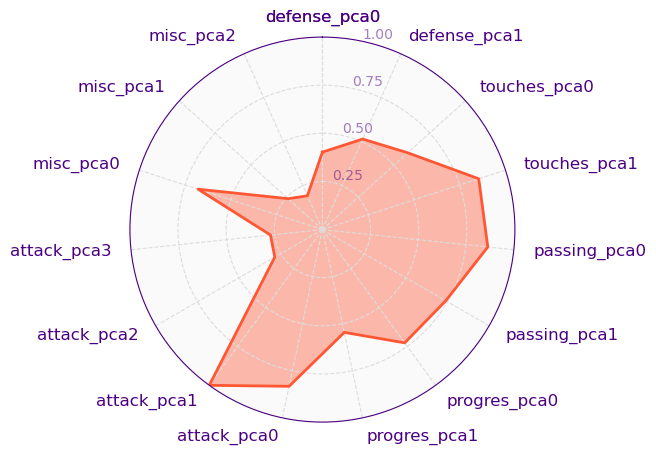

In [141]:
player = 'Téji Savanier'
season = 2023

plot_data = player_data_pca_scaled.loc[f'{player}_{season}']
# plot_data.index = [idx[0] for idx in plot_data.index.str.split('_')]

plot_team_radar(plot_data.to_dict())

In [126]:
plot_data

defense_pca0    0.166239
defense_pca1    0.598799
touches_pca0    0.151399
touches_pca1    0.585120
passing_pca0    0.249775
passing_pca1    0.500827
progres_pca0    0.662065
progres_pca1    0.830272
attack_pca0     0.558020
attack_pca1     0.442710
attack_pca2     0.246899
attack_pca3     0.700673
misc_pca0       0.373285
misc_pca1       0.433334
misc_pca2       0.305503
Name: Brajan Gruda_2023, dtype: float64

<Axes: xlabel='passing_pca1', ylabel='passing__KP'>

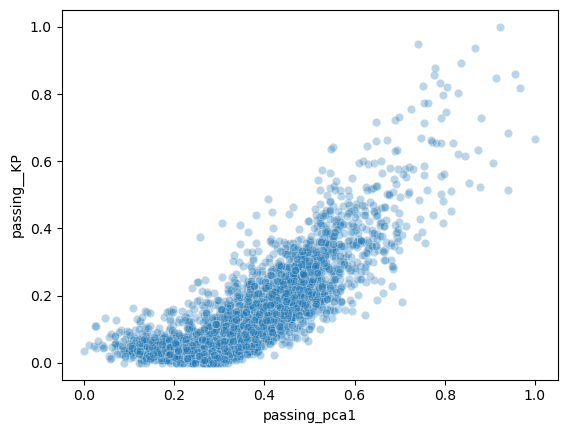

In [128]:
sns.scatterplot(x=player_data_pca_scaled['passing_pca1'],
                y=player_data_scaled['passing__KP'], alpha=0.3)

In [155]:
player_data_pca_scaled[(player_data_pca_scaled['defense_pca0'] >= 0.8) &
                       (player_data_pca_scaled['defense_pca1'] <= 0.5)]

,defense_pca0,defense_pca1,touches_pca0,touches_pca1,passing_pca0,passing_pca1,progres_pca0,progres_pca1,attack_pca0,attack_pca1,attack_pca2,attack_pca3,misc_pca0,misc_pca1,misc_pca2
_Player_,,,,,,,,,,,,,,,
Andrei Girotto_2022,0.958823,0.284318,0.754332,0.189221,0.564336,0.189434,0.413842,0.181264,0.160028,0.480457,0.478497,0.382610,0.654039,0.102964,0.519574
Danilo_2022,0.892541,0.457133,0.754806,0.355161,0.701325,0.192443,0.525602,0.211040,0.262441,0.423440,0.324950,0.473091,0.586149,0.064158,0.600691
Lucas Martínez Quarta_2022,0.909851,0.278222,0.622251,0.160151,0.472876,0.153265,0.416206,0.237414,0.134689,0.408691,0.454311,0.381979,0.452555,0.190020,0.662232
Bernardo_2023,0.890909,0.432944,0.722086,0.384793,0.654767,0.270214,0.485580,0.294261,0.241523,0.454232,0.514718,0.512837,0.671709,0.113140,0.635509
Nico Schlotterbeck_2023,0.844839,0.493439,0.897238,0.254140,0.789949,0.046806,0.664689,0.037300,0.251408,0.471452,0.563900,0.384352,0.647796,0.109629,0.641986
Antonee Robinson_2023,0.807368,0.362588,0.518191,0.530015,0.562800,0.555672,0.586723,0.612953,0.207048,0.607365,0.362109,0.556102,0.541730,0.155698,0.491772
Leonardo Balerdi_2023,0.861003,0.237911,0.721467,0.155176,0.563397,0.126303,0.491116,0.192666,0.111606,0.448096,0.332286,0.537729,0.612965,0.154835,0.705744
Frederic Guilbert_2023,0.812749,0.460991,0.536170,0.443550,0.568745,0.451669,0.418352,0.410003,0.239925,0.568115,0.317903,0.422821,0.496610,0.210498,0.545259
Alessandro Buongiorno_2023,0.837300,0.226660,0.477727,0.118293,0.317276,0.209099,0.216067,0.330834,0.155252,0.474316,0.676859,0.457268,0.613959,0.167282,0.507894
